In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import tensorflow as tf
tf.random.set_seed(7)

Il problema è posto come un problema di regressione. Di conseguenza:

* $X(t)$ sarà la variabile indipendente;
* $X(t+1)$ sarà la variabile dipendente, ovvero $y$.

Creiamo una funzione che organizzi il dataset in questo modo.

In [2]:
def create_dataset(dataset):
	X = np.array([dataset[i, 0] for i in range(len(dataset) - 2)]).reshape(-1, 1)
	y = np.array([dataset[i+1, 0] for i in range(len(dataset) - 2)]).reshape(-1, 1)
	return np.expand_dims(X, -1), y

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


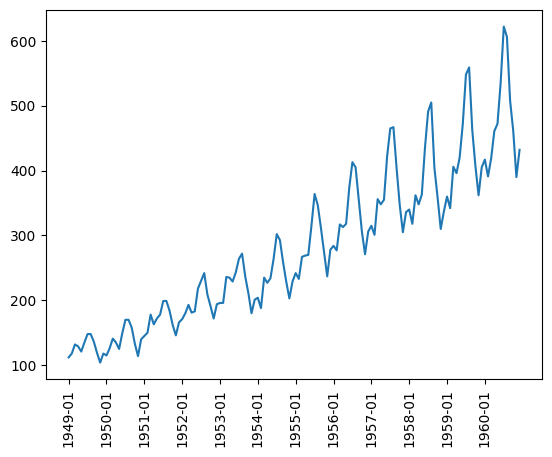

In [3]:
dataframe = pd.read_csv('../datasets/airline-passengers.csv')
print(dataframe.head())

fig, ax = plt.subplots()
ax.plot(dataframe['Month'], dataframe['Passengers'])
plt.xticks(rotation=90)
ax.set_xticks(dataframe['Month'][::12])
plt.show()

In [4]:
dataset = dataframe['Passengers'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [5]:
X_train, y_train = create_dataset(train)
X_test, y_test = create_dataset(test)

In [6]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(4, input_shape=(1, 1)))
model.add(keras.layers.Dense(1))
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.MeanSquaredError()])

model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=1)


Epoch 1/100
98/98 [==============================] - 0s 686us/step - loss: 0.0633 - mean_squared_error: 0.0633
Epoch 2/100
98/98 [==============================] - 0s 670us/step - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 3/100
98/98 [==============================] - 0s 649us/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 4/100
98/98 [==============================] - 0s 816us/step - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 5/100
98/98 [==============================] - 0s 861us/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 6/100
98/98 [==============================] - 0s 675us/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7/100
98/98 [==============================] - 0s 649us/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 8/100
98/98 [==============================] - 0s 712us/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 9/100
98/98 [==============================] - 0s 768us/step - loss: 0.0052 - mean_squared_error: 0.0052
E

2/2 [==============================] - 0s 2ms/step


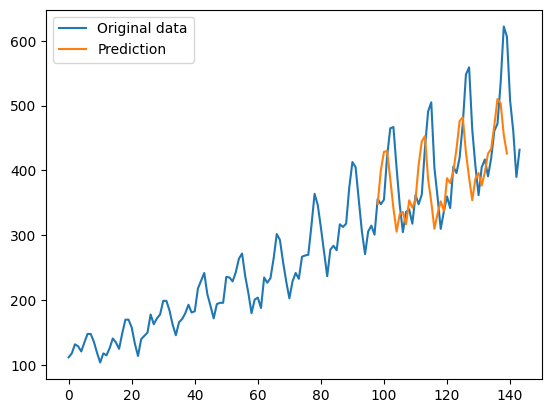

In [7]:
y_pred = model.predict(X_test)
y_pred_or = scaler.inverse_transform(y_pred)

plt.plot(scaler.inverse_transform(dataset), label='Original data')
plt.plot(range(len(X_train), len(X_train)+len(y_pred_or)), y_pred_or, label='Prediction')
plt.legend()
plt.show()